In [90]:
import random
from collections import Counter
from statistics import mean, pstdev, stdev
import matplotlib.pyplot as plt
from ultimate_pig import Simulation, get_mean_wins, get_highest_score, get_stddev

In [91]:
%matplotlib inline

In [92]:
#This Takes 2-3 Minutes To Run, change the 5000 to 1000 runs for quicker results.
sim1 = Simulation(100,5000)
mean_dict = get_mean_wins(sim1)
stddev_dict = get_stddev(sim1)
highest_score_dict = get_highest_score(sim1)

In [93]:
mean_of_sims = mean(mean_dict.values())
stdev_of_sims = pstdev(mean_dict.values())

The Highest Single Score was 301, Rolling Each Turn Until The Score Was at least 73
....But That Is a Rare Score 
Counter({0: 3928, 73: 249, 74: 239, 75: 199, 76: 136, 77: 99, 78: 53, 149: 19, 148: 16, 147: 12, 151: 12, 150: 9, 146: 8, 152: 8, 154: 3, 153: 2, 223: 2, 155: 1, 156: 1, 221: 1, 225: 1, 226: 1, 301: 1})


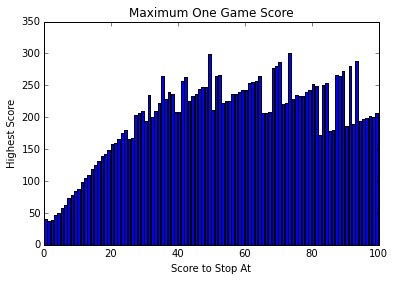

In [94]:
plt.bar(list(highest_score_dict.keys()), list(highest_score_dict.values()))
# plt.xticks(range(0,100,5))
plt.xlabel("Score to Stop At")
plt.ylabel("Highest Score")
plt.title("Maximum One Game Score")
highest = [0,0]

for key in highest_score_dict:
    if highest_score_dict[key] > highest[1]:
        highest = [key, highest_score_dict[key]]
print('The Highest Single Score was {}, Rolling Each Turn Until The Score Was at least {}'.format(highest[1], highest[0]))
print('....But That Is a Rare Score \n{}'.format(Counter(sim1.win_dict[highest[0]])))

The Scores Get More Varried Towards The Middle, and While Waiting Might Get you A Higher Score, You Also Get A LOT of Zeros.


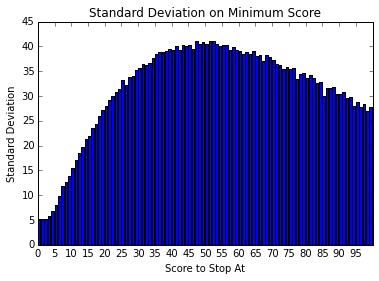

In [96]:
plt.bar(list(stddev_dict.keys()), list(stddev_dict.values()))
plt.xticks(range(0,100,5))
plt.xlabel("Score to Stop At")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation on Minimum Score")
print('The Scores Get More Varried Towards The Middle, and While Waiting Might Get you A Higher Score, You Also Get A LOT of Zeros.')

The Best Number to stop at For A Consistently High Score is 24, With An Average Score of 56.9158


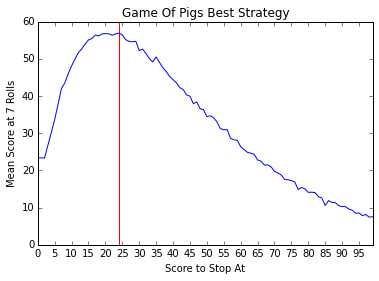

In [119]:
best = [0,0]

for key in mean_dict:
    if mean_dict[key] > best[1]:
        best = [key, mean_dict[key]]
        
print('The Best Number to stop at For A Consistently High Score is {}, With An Average Score of {}'.format(best[0], best[1]))
plt.plot(list(mean_dict.values()))
plt.xticks(range(0,100,5))
plt.xlabel("Score to Stop At")
plt.ylabel("Mean Score at 7 Rolls")
plt.title("Game Of Pigs Best Strategy")
ymin,ymax = plt.ylim()
plt.vlines(best[0],ymin, ymax, color="red")
plt.show()


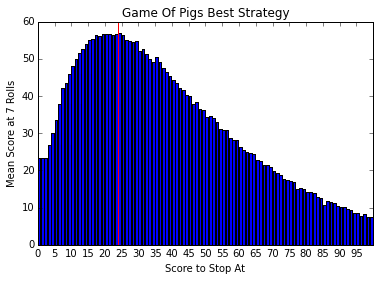

In [120]:
plt.bar(list(mean_dict.keys()), list(mean_dict.values()))
plt.xticks(range(0,100,5))
plt.xlabel("Score to Stop At")
plt.ylabel("Mean Score at 7 Rolls")
plt.title("Game Of Pigs Best Strategy")
ymin,ymax = plt.ylim()
plt.vlines(best[0],ymin, ymax, color="red")
plt.show()

In [116]:
print("Althought the scores range from {} to {}, With a Standard Deviation of {}".format(min(sim1.win_dict[best[0]]),max(sim1.win_dict[best[0]]),(round(pstdev(sim1.win_dict[best[0]]),4))))
print('Meaning Most Of Time, Your Score Will be between {} And {}'.format(round(mean(sim1.win_dict[best[0]])-(pstdev(sim1.win_dict[best[0]]))), round(mean(sim1.win_dict[best[0]])+ (pstdev(sim1.win_dict[best[0]])))))

Althought the scores range from 0 to 180, With a Standard Deviation of 31.3954
Meaning Most Of Time, Your Score Will be between 26 And 88


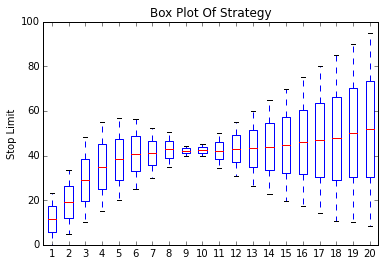

In [162]:
"""I'm not sure what this plot is doing, if it means anything at all, or how to fix the lables"""
#I want to only display every 5th sample, to keep it simple
box_data = ([[mean_dict.get(x), x] for x in range(0,100,5)])
plt.boxplot(box_data)
plt.title("Box Plot Of Strategy")
plt.ylabel("Stop Limit")
# This doesn't work at all....
# plt.xticks(range(1,100))
plt.show()